In [1]:
#데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

#데이터 x,y로 나누기
df_x=diabetes.data
df_y=diabetes.target

In [2]:
#이미 데이터가 numpy형식임으로 변경x
print(type(df_x))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
#x,y데이터 train, text로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [4]:
#모델 준비
print(df_x.shape)
print(df_y.shape)
#특성 10개
#길이가 10인 W와 1개의 숫자인 b를 준비
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

(442, 10)
(442,)


In [5]:
#모델 구현
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
#MSE 구현
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  #두 값의 차이의 제곱의 평균
    return mse

#손실함수 정의
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

In [7]:
#기울기(gradient) 구현
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 직접미분공식을 이용해서 w에 대한 기울기 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [8]:
#학습률 설정
LEARNING_RATE = 0.0001

In [9]:
#모델 학습하기
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 29525.4340
Iteration 20 : Loss 29431.6857
Iteration 30 : Loss 29338.3113
Iteration 40 : Loss 29245.3094
Iteration 50 : Loss 29152.6784
Iteration 60 : Loss 29060.4170
Iteration 70 : Loss 28968.5237
Iteration 80 : Loss 28876.9969
Iteration 90 : Loss 28785.8352
Iteration 100 : Loss 28695.0371
Iteration 110 : Loss 28604.6013
Iteration 120 : Loss 28514.5261
Iteration 130 : Loss 28424.8103
Iteration 140 : Loss 28335.4524
Iteration 150 : Loss 28246.4509
Iteration 160 : Loss 28157.8044
Iteration 170 : Loss 28069.5115
Iteration 180 : Loss 27981.5709
Iteration 190 : Loss 27893.9810
Iteration 200 : Loss 27806.7405
Iteration 210 : Loss 27719.8479
Iteration 220 : Loss 27633.3020
Iteration 230 : Loss 27547.1013
Iteration 240 : Loss 27461.2444
Iteration 250 : Loss 27375.7300
Iteration 260 : Loss 27290.5567
Iteration 270 : Loss 27205.7232
Iteration 280 : Loss 27121.2280
Iteration 290 : Loss 27037.0698
Iteration 300 : Loss 26953.2473
Iteration 310 : Loss 26869.7592
Iteration 320 : L

In [10]:
#test로 성능확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

19134.84750103948

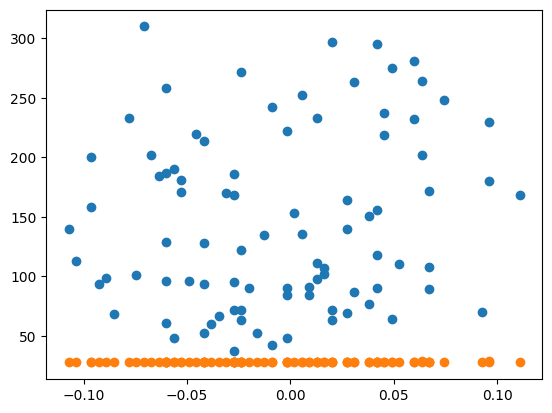

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [14]:
#로스율 줄이기
#상관관계 분석
for i in range(0,10):
  print("corr",i,np.corrcoef(diabetes.data[:, i],diabetes.target))
# 0번 0.18, 1번 0.04  2번 0.58  3번 0.44  4번 0.21
# 5번 0.17  6번 -0.39  7번 0.43  8번 0.56  9번 0.38

corr 0 [[1.         0.18788875]
 [0.18788875 1.        ]]
corr 1 [[1.       0.043062]
 [0.043062 1.      ]]
corr 2 [[1.         0.58645013]
 [0.58645013 1.        ]]
corr 3 [[1.         0.44148176]
 [0.44148176 1.        ]]
corr 4 [[1.         0.21202248]
 [0.21202248 1.        ]]
corr 5 [[1.         0.17405359]
 [0.17405359 1.        ]]
corr 6 [[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
corr 7 [[1.         0.43045288]
 [0.43045288 1.        ]]
corr 8 [[1.         0.56588259]
 [0.56588259 1.        ]]
corr 9 [[1.         0.38248348]
 [0.38248348 1.        ]]


In [15]:
#피처수와 학습률 변경
print(diabetes.feature_names)
df_x1=[]
df_x1=diabetes.data[:, [2,3,7,8]]

print(df_x1.shape)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 4)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_x1, df_y, test_size=0.2, random_state=42)
#특성 4개
import numpy as np
W = np.random.rand(4)
b = np.random.rand()

#모델 학습하기
losses = []

#모델 구현
def model(X, W, b):
    predictions = 0
    for i in range(4):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#학습도 2000번으로 증가
LEARNING_RATE = 0.1
for i in range(1, 2000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6281.3128
Iteration 20 : Loss 5957.4300
Iteration 30 : Loss 5899.3862
Iteration 40 : Loss 5845.5033
Iteration 50 : Loss 5792.7419
Iteration 60 : Loss 5741.0452
Iteration 70 : Loss 5690.3911
Iteration 80 : Loss 5640.7584
Iteration 90 : Loss 5592.1263
Iteration 100 : Loss 5544.4744
Iteration 110 : Loss 5497.7828
Iteration 120 : Loss 5452.0319
Iteration 130 : Loss 5407.2025
Iteration 140 : Loss 5363.2759
Iteration 150 : Loss 5320.2337
Iteration 160 : Loss 5278.0579
Iteration 170 : Loss 5236.7309
Iteration 180 : Loss 5196.2354
Iteration 190 : Loss 5156.5545
Iteration 200 : Loss 5117.6716
Iteration 210 : Loss 5079.5705
Iteration 220 : Loss 5042.2352
Iteration 230 : Loss 5005.6502
Iteration 240 : Loss 4969.8002
Iteration 250 : Loss 4934.6703
Iteration 260 : Loss 4900.2458
Iteration 270 : Loss 4866.5124
Iteration 280 : Loss 4833.4560
Iteration 290 : Loss 4801.0628
Iteration 300 : Loss 4769.3194
Iteration 310 : Loss 4738.2125
Iteration 320 : Loss 4707.7292
Iteration 330 : L

In [17]:
#test로 성능확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2919.9121633806317

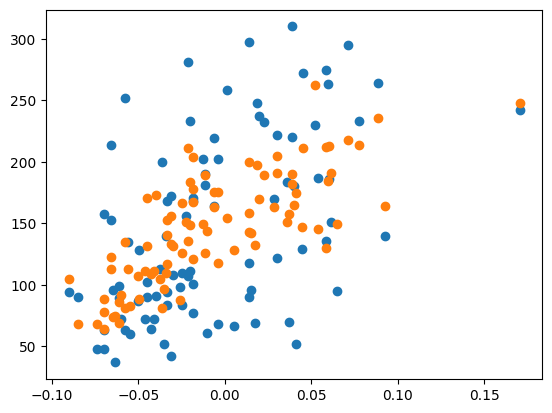

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()